## Production Volume Forecasting 
## Course: Statistical Applications and Quantitative Methods  

### Setting - up 

In [10]:
# Suppress messages and warnings
options(message = -1)
options(warn = -1)

# Load the libraries   
library(tidyverse)
library(ggplot2)
library(gridExtra)
library(forecast)
library(lmtest)
library(MLmetrics)

### Data pre-processing: 

In [2]:
# Import Data
treat <- read.csv("C:/GitHub/Production-Volume-Forecasting-Model/Harmon.csv", header=TRUE)

# Data structure
glimpse(treat)

# Rename column names
colnames(treat) <- c("mo", "cs","cp", "cp.1", "cp.2", "da", "da.1", "da.2", "si")

Observations: 61
Variables: 9
$ Month            <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,...
$ Case.Shipments   <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, 42...
$ Consumer.Packs   <int> 0, 0, 0, 0, 15012, 62337, 4022, 3130, 422, 0, 0, 0...
$ CP.i.1           <int> NA, 0, 0, 0, 0, 15012, 62337, 4022, 3130, 422, 0, ...
$ CP.i..2          <int> NA, NA, 0, 0, 0, 0, 15012, 62337, 4022, 3130, 422,...
$ Dealer.Allowance <int> 396776, 152296, 157640, 246064, 335716, 326312, 26...
$ DA.i.1           <int> NA, 396776, 152296, 157640, 246064, 335716, 326312...
$ DA.i.2           <int> NA, NA, 396776, 152296, 157640, 246064, 335716, 32...
$ Seasonal.Index   <int> 113, 98, 102, 107, 119, 104, 107, 81, 113, 97, 95,...


### Time-series plot:  

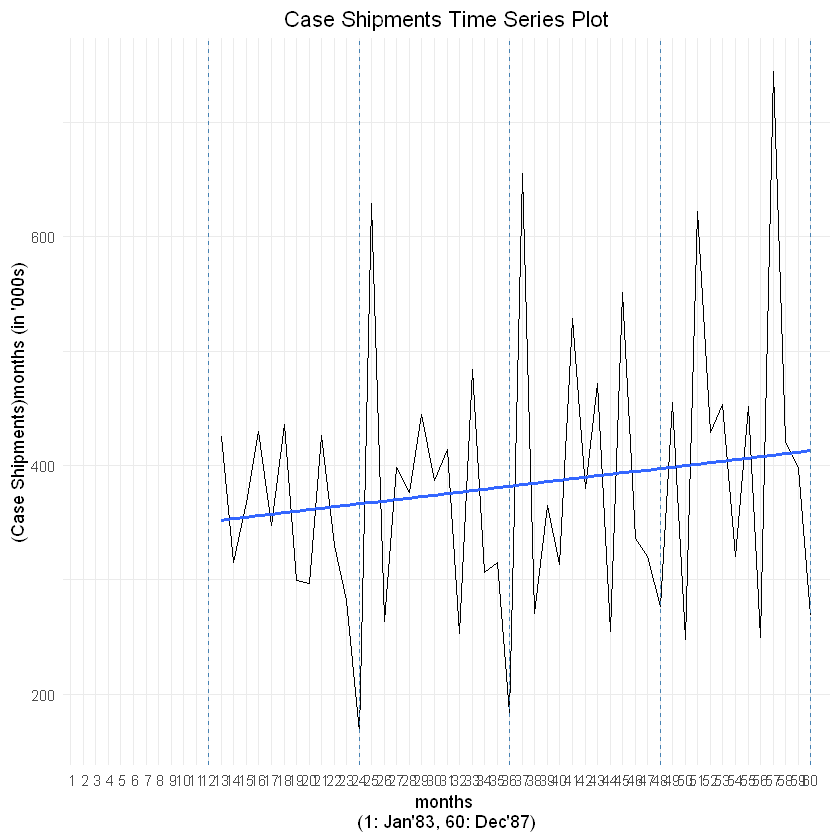

In [3]:
# Suppress messages and warnings

# Time-Series plot 
p <- ggplot(data = treat, aes(x = mo, y = cs/1000)) 
plot1 <-  p + geom_line() + 
          geom_smooth(method = 'lm', se = FALSE)+ 
          geom_vline(xintercept = 12, linetype = "dashed", colour = "steelblue")+
          geom_vline(xintercept = 24, linetype = "dashed", colour = "steelblue")+
          geom_vline(xintercept = 36, linetype = "dashed", colour = "steelblue")+
          geom_vline(xintercept = 48, linetype = "dashed", colour = "steelblue")+
          geom_vline(xintercept = 60, linetype = "dashed", colour = "steelblue")+
          labs(x = "months \n(1: Jan'83, 60: Dec'87)", y = "(Case Shipments)months (in '000s)")+  
          ggtitle("Case Shipments Time Series Plot") + 
          scale_x_discrete(limits = c(1:60)) +  
          theme_minimal() +
          theme(plot.title = element_text(hjust = 0.5)) 

# Plot 
plot1

### Regression Model: 

In [4]:
# Monthly Sales (i.e. "Case Shimpents") are influenced by:  
# Time (Month) 
# Consumer Promotions (cp) and Dealer Allowances (da) during the given month
# Consumer Promotions and Dealer Allowances during the previous months (cp.1, cp.2, da.1 and da.2)
# Seasonality (si)

# Using step-wise regression model 
model1 <- step(lm(cs ~ mo + cp + cp.1 + cp.2 + da + da.1 + da.2 + si, data = treat, na.action = na.exclude))

# Present Parameter Estimates, Coefficient of Determination, etc.
summary(model1)

Start:  AIC=1013.13
cs ~ mo + cp + cp.1 + cp.2 + da + da.1 + da.2 + si

       Df  Sum of Sq        RSS    AIC
- cp.2  1 1.1047e+08 4.8525e+10 1011.2
- da.1  1 6.2223e+08 4.9037e+10 1011.7
<none>               4.8414e+10 1013.1
- mo    1 5.6001e+09 5.4015e+10 1016.4
- da.2  1 9.2496e+09 5.7664e+10 1019.5
- cp.1  1 3.0240e+10 7.8654e+10 1034.4
- cp    1 1.0267e+11 1.5109e+11 1065.8
- si    1 1.0997e+11 1.5838e+11 1068.0
- da    1 1.3507e+11 1.8349e+11 1075.1

Step:  AIC=1011.24
cs ~ mo + cp + cp.1 + da + da.1 + da.2 + si

       Df  Sum of Sq        RSS    AIC
- da.1  1 7.8777e+08 4.9313e+10 1010.0
<none>               4.8525e+10 1011.2
- mo    1 5.5419e+09 5.4067e+10 1014.4
- da.2  1 9.3252e+09 5.7850e+10 1017.7
- cp.1  1 3.0348e+10 7.8873e+10 1032.6
- cp    1 1.0674e+11 1.5526e+11 1065.1
- si    1 1.0986e+11 1.5838e+11 1066.0
- da    1 1.3756e+11 1.8609e+11 1073.8

Step:  AIC=1010.01
cs ~ mo + cp + cp.1 + da + da.2 + si

       Df  Sum of Sq        RSS    AIC
<none>               4.93


Call:
lm(formula = cs ~ mo + cp + cp.1 + da + da.2 + si, data = treat, 
    na.action = na.exclude)

Residuals:
   Min     1Q Median     3Q    Max 
-78216 -26224   3903  23364  83259 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -9.319e+04  4.333e+04  -2.151  0.03746 *  
mo           1.082e+03  4.088e+02   2.648  0.01143 *  
cp           4.076e-01  4.221e-02   9.656 4.05e-12 ***
cp.1        -2.170e-01  3.827e-02  -5.671 1.27e-06 ***
da           6.829e-02  6.270e-03  10.891 1.13e-13 ***
da.2        -1.786e-02  6.055e-03  -2.950  0.00523 ** 
si           3.911e+03  3.972e+02   9.847 2.30e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 34680 on 41 degrees of freedom
  (13 observations deleted due to missingness)
Multiple R-squared:  0.9285,	Adjusted R-squared:  0.9181 
F-statistic: 88.79 on 6 and 41 DF,  p-value: < 2.2e-16


### Conduct Durbin - Watson Test:

In [5]:
# Conduct Durbin Watson Test
dwtest(model1, order.by = NULL, alternative = c("two.sided"))


	Durbin-Watson test

data:  model1
DW = 2.2986, p-value = 0.3701
alternative hypothesis: true autocorrelation is not 0


### Residuals' Plots:

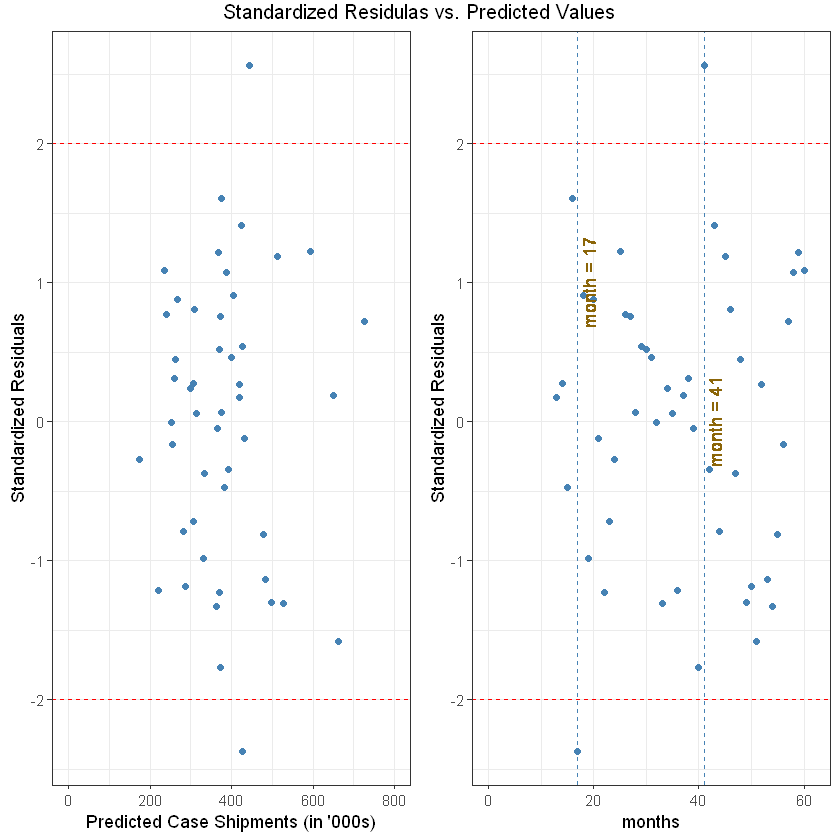

In [6]:
# Standardized Residual
standardized.residual <- rstandard(model1)
predicted <- predict(model1)/1000
mo <- treat$mo 
predicts <- as.data.frame(cbind(mo, predicted, standardized.residual))

# plotting the residuals
p_left <- ggplot(predicts, aes(predicted, standardized.residual)) + 
          geom_point(colour = "steelblue") + 
          geom_hline(yintercept = 2, linetype = "dashed", colour = "red")+
          geom_hline(yintercept = -2, linetype = "dashed", colour = "red")+
          labs(x = "Predicted Case Shipments (in '000s)", y = "Standardized Residuals")+ 
          scale_x_continuous(limits = c(0,800))+
          theme_bw() +       
          theme(legend.position="none") 


p_right <-  ggplot(predicts, aes(mo, standardized.residual)) + 
            geom_point(colour = "steelblue") + 
            geom_hline(yintercept = 2, linetype = "dashed", colour = "red")+
            geom_hline(yintercept = -2, linetype = "dashed", colour = "red")+
            geom_vline(xintercept = 17, linetype = "dashed", colour = "steelblue")+
            geom_text(x = 19, y = 1.0, label = "month = 17", color = "darkgoldenrod4", angle = 90) +             
            geom_vline(xintercept = 41, linetype = "dashed", colour = "steelblue")+
            geom_text(x = 43, y = 0, label = "month = 41", color = "darkgoldenrod4", angle = 90) +  
            labs(x = "months", y = "Standardized Residuals")+ 
            scale_x_continuous(limits = c(0,62))+
            theme_bw() +
            theme(legend.position="none")

grid.arrange(p_left, p_right, top = "Standardized Residulas vs. Predicted Values",
            layout_matrix = matrix(c(1,2), ncol=2, byrow=TRUE))

### Time-Series plot: Predicted vs. Actual  

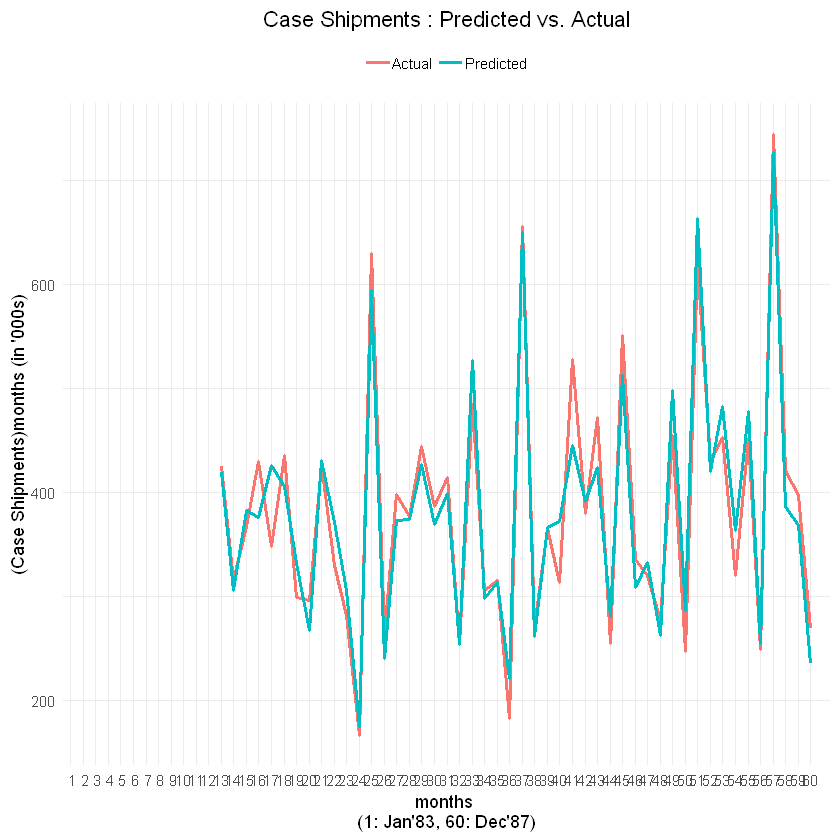

In [7]:
plot3 <- ggplot(treat, aes(mo)) + 
         geom_line(aes(y = cs/1000, colour = "Actual"), size = 1.0) + 
         geom_line(aes(y = fitted(model1)/1000, colour = "Predicted"), size = 1.0)+
         labs(x = "months \n(1: Jan'83, 60: Dec'87)", y = "(Case Shipments)months (in '000s)")+  
         ggtitle("Case Shipments : Predicted vs. Actual") + 
         scale_x_discrete(limits = c(1:60)) +  
         theme_minimal() +
         theme(plot.title = element_text(hjust = 0.5))+
         theme(legend.position="top") + theme(legend.title=element_blank())

# Plot 
plot3

### Mean Absolute Percentage Error: MAPE

In [8]:
# MAPE of forecast 
actual <- treat$cs
predicted <- fitted(model1)
MAPE(predicted[13:60], actual[13:60])

[1] 0.07147035

### Predictions: 

In [9]:
## Make prediction and compute confidence interval
n <- nrow(treat)    # number of observatons 
forecast(model1, newdata = treat[n, ])

  Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1       501189.2 452432.5 549945.9 425593.9 576784.5


*Point Forecast* | *Lo 80*   |   *Hi 80*   |  *Lo 95*  |  *Hi 95*    
 ---------------- |  -------  |  --------   |  -------  | ---------
     501189.2     | 452432.5  |  549945.9   |  425593.9 | 576784.5